Quantum Circuit for Bernstein-Vazirani:


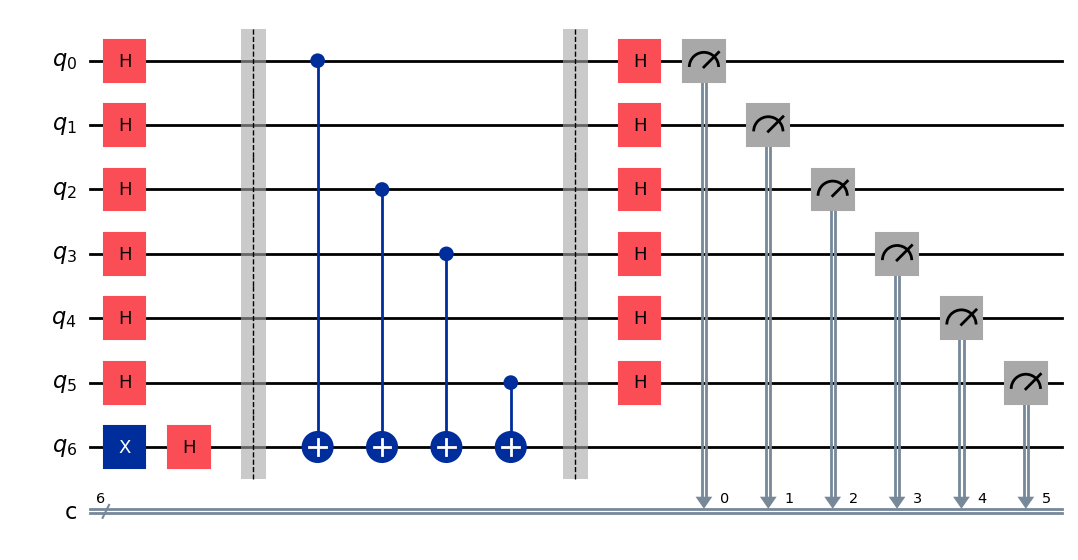


Simulation Results (Counts): {'101101': 1024}

The secret string was:     101101
The string we measured is: 101101

Success! The measured string matches the secret string.

Histogram of Measurement Outcomes:


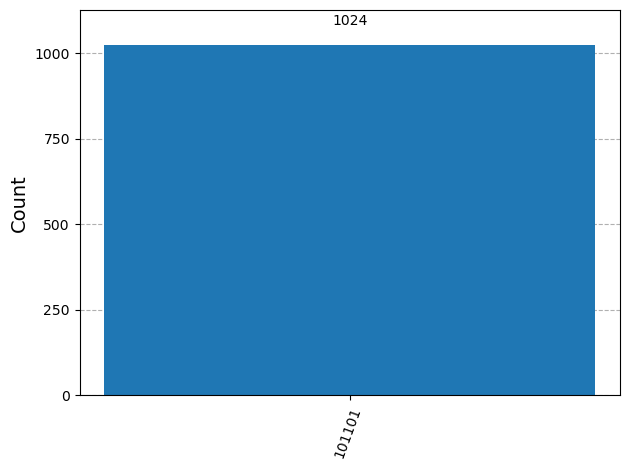

In [16]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import *
import numpy as np

# --- Define the hidden bit string 's' ---
# The goal of the algorithm is to find this secret string.
# You can change this to any bit string.
secret_string = '101101'
n = len(secret_string)

# --- Implementation following the Algorithm Steps ---

# Step 1: Initialize registers
# We need n qubits for the input register and one ancillary qubit for the oracle.
# We also need n classical bits to store the measurement results.
# The qubits are automatically initialized to the state |0⟩.
circuit = QuantumCircuit(n + 1, n)

# Step 2: Apply Hadamard gates to all input qubits
# This puts the input register into a superposition of all possible states.
circuit.h(range(n))

# To create the phase oracle, we need the ancillary qubit in the state |−⟩.
# We achieve this by applying an X gate (to make it |1⟩) followed by a Hadamard gate.
circuit.x(n)
circuit.h(n)

circuit.barrier() # for visual separation

# Step 3: Apply the phase oracle U_f
# The oracle flips the phase of the states |x⟩ based on the secret string 's'.
# It applies a CNOT for each '1' in the secret_string.
# The i-th qubit is the control and the ancillary qubit is the target.
# We iterate through the secret string in reverse because Qiskit orders qubits from right to left (q0, q1, ...).
for i, bit in enumerate(reversed(secret_string)):
    if bit == '1':
        circuit.cx(i, n)

circuit.barrier() # for visual separation

# Step 4: Apply Hadamard gates again to the input qubits
# This interferes the states to isolate the secret string 's'.
circuit.h(range(n))

# Step 5: Measure the n-qubit register
# We measure the first n qubits and store the results in the n classical bits.
circuit.measure(range(n), range(n))

# --- Visualization and Simulation ---

# Draw the quantum circuit
print("Quantum Circuit for Bernstein-Vazirani:")
display(circuit.draw('mpl')) # 'mpl' gives a nicer-looking diagram

# Use the Qiskit Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# We run it 1024 times (shots) to see the probability distribution.
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()


# Get the counts (the frequency of each measurement outcome)
counts = result.get_counts(circuit)
print("\nSimulation Results (Counts):", counts)

# Find the most frequent outcome
measured_string = max(counts, key=counts.get)

print(f"\nThe secret string was:     {secret_string}")
print(f"The string we measured is: {measured_string}")
if measured_string == secret_string:
    print("\nSuccess! The measured string matches the secret string.")
else:
    print("\nFailure! The measured string does not match.")

# Plot the results as a histogram
print("\nHistogram of Measurement Outcomes:")
display(plot_histogram(counts))